### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание.


Приготовьтесь, потому что на лекциях и семинарах мы уже прошли через джунгли теории, оттачивая наши навыки в мастерстве оптимизации функционалов. Мы погружались в глубины градиентного спуска, изучая его в каждом возможном амплуа — от классического полного градиента до беспощадного стохастического градиента, не забывая про метод с импульсом, который как боксерский удар прорывается сквозь проблемы оптимизации.

Теперь же перед вами стоит вызов, который не для слабонервных. Ваша миссия, если вы, конечно, осмелитесь ее принять, — взять в арсенал четыре разнообразных вида градиентного спуска и смастерить из них инструмент, способный расправиться с любой задачей. Вам предстоит создать собственную версию линейной регрессии, такую, что даже самые опытные аналитики данных будут смотреть на нее с завистью. Испытайте на реальных данных весь арсенал вашего градиентного спуска, сравните, какой из них выходит на арену оптимизации как несокрушимый чемпион.

Это задание не для тех, кто привык стоять в сторонке. Это ваш момент славы, ваш шанс выйти на арену, где вашим оружием будет код, а противниками — самые коварные задачи машинного обучения. Покажите, на что вы способны, и пусть ваш код станет легендой!

@GPT-4

## Задание 1. Реализация градиентного спуска (1.75 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое размышление № 1

Ключевая характеристика антиградиента заключается в том, что он направлен к самому быстрому уменьшению значения функции в конкретной точке. Исходя из этого, разумным подходом будет начать движение с определенной точки, переместиться в направлении антиградиента, затем вновь вычислить антиградиент, совершить движение и продолжать таким образом. Давайте опишем этот процесс более формализованно.

Предположим, что $w_0$ – это исходный набор параметров (к примеру, набор из нулей или полученный из какого-либо случайного распределения). В этом случае простой градиентный спуск предполагает выполнение следующих действий до достижения сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое размышление № 2

### Задание 0.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

Давайте найдем градиент функции $Q(w)$ по $w$, используя матричное дифференцирование. Функция $Q(w)$ определена как:

$$
Q(w) = \frac{1}{\ell} (y - Xw)^T (y - Xw)
$$

где:
- $Q(w)$ — функция потерь,
- $\ell$ — количество наблюдений


- $y$ — вектор истинных значений,
- $X$ — матрица признаков,
- $w$ — вектор весов.

Градиент функции потерь $Q(w)$ по $w$ находится следующим образом:

1. Раскроем скобки в выражении для $Q(w)$:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - y^TXw - w^TX^Ty + w^TX^TXw)
$$

2. Заметим, что $y^TXw$ и $w^TX^Ty$ представляют собой скаляры и равны между собой. Тогда выражение упрощается до:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - 2y^TXw + w^TX^TXw)
$$

3. Теперь дифференцируем $Q(w)$ по $w$. При дифференцировании $y^Ty$ как константа относительно $w$ исчезает, а дифференциация оставшейся части дает:

$$
\nabla_w Q(w) = \frac{1}{\ell} (-2X^Ty + 2X^TXw)
$$

4. Упростим выражение, вынеся 2 за скобки:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Таким образом, градиент функции потерь $Q(w)$ по вектору весов $w$ равен:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Это выражение и есть искомый градиент.

### Задание 1.1. Родительский класс BaseDescent (0.25 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.25 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое размышление № 3

Конечно, давайте переформулируем и перепишем ваш текст для лучшего понимания.

В контексте задач машинного обучения, обычно функционал ошибки $Q(w)$ можно представить как среднее арифметическое отдельных ошибок на каждом элементе выборки:

$$
    Q(w) = \frac{1}{\ell} \sum_{i = 1}^{\ell} q_i(w),
$$

где каждая функция $q_i(w)$ отражает ошибку на i-ом объекте выборки.

Основная сложность применения метода градиентного спуска заключается в необходимости вычисления градиента по всей выборке на каждом шаге. Это может быть особенно затруднительно при работе с большими данными. Однако, для эффективного шага в направлении минимизации функции потерь, абсолютная точность градиента может быть не столь критична.

Мы можем приблизить градиент всей функции, используя среднее значение градиентов для случайно выбранной подвыборки объектов:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|} \sum_{i \in B} \nabla_{w} q_{i}(w_{k}),
$$

где $B$ является подмножеством выборки с случайно выбранными индексами.

Этот подход приводит нас к методу **стохастического градиентного спуска**, который значительно упрощает вычисления и ускоряет процесс обучения, особенно на больших данных.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.25 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое размышление № 4

В процессе оптимизации может случиться так, что направление наискорейшего спуска, определенное антиградиентом, будет резко колебаться от одного шага к другому. Это часто происходит, если функция потерь имеет вытянутые уровни, что приводит к тому, что градиент, всегда перпендикулярный этим линиям, меняет свое направление на противоположное при каждом шаге. Эти колебания могут серьезно замедлить сходимость оптимизационного процесса из-за постоянных "колебаний" в обратных направлениях. Чтобы сгладить эти осцилляции и ускорить процесс оптимизации, применяется метод усреднения градиентов из нескольких предыдущих шагов, тем самым снижая "шум" и выявляя общее предпочтительное направление движения. Это достигается с помощью введения вектора инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}),
\end{align}

где $\alpha$ — коэффициент, контролирующий влияние градиентов предыдущих шагов, уменьшая их вклад со временем. Можно использовать аппроксимацию градиента для вычисления $h_{k + 1}$. Для осуществления следующего шага градиентного спуска текущую точку смещают на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Такой подход позволяет сгладить колебания градиента: если градиент по какому-то направлению часто меняет знак, его вклад в вектор инерции будет уменьшаться, в то время как постоянное направление градиента приведет к увеличению шага в этом направлении, делая процесс оптимизации более стабильным и направленным.

### Задание 1.4 Метод Momentum MomentumDescent (0.25 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическо размышление № 5

Выбор размера шага играет критическую роль в эффективности градиентного спуска. Слишком большой шаг может привести к тому, что процесс будет "перепрыгивать" минимальное значение, а слишком маленький шаг существенно замедлит достижение минимума, требуя большего количества итераций. Предварительно определить идеальный размер шага невозможно, и даже стратегии постепенного его уменьшения могут оказаться неэффективными.

AdaGrad предлагает индивидуальный подход к регулированию длины шага для каждой отдельной компоненты параметров. Суть метода заключается в уменьшении размера шага в зависимости от общей длины предыдущих шагов по данному параметру:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Где $\varepsilon$ — малая добавка для предотвращения деления на ноль.

В AdaGrad размер шага может быть фиксирован с самого начала, исключая необходимость его подбора в процессе. Этот метод особенно эффективен в задачах с разреженными данными, где большинство признаков для объектов равны нулю. Таким образом, большие шаги будут совершаться по редко встречающимся признакам, в то время как по часто встречающимся — маленькие.

Основной недостаток AdaGrad заключается в неизбежном замедлении шагов из-за монотонного роста $G_{kj}$, что может остановить процесс до достижения оптимального решения. Эту проблему решает метод RMSprop, где применяется экспоненциальное сглаживание для градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

Здесь шаг адаптируется в зависимости от интенсивности движения по каждому направлению на недавних итерациях.

Объединяя идеи этих методов, можно достичь эффективного накопления информации о градиентах для стабилизации процесса и внедрить адаптивную длину шага для каждого параметра, обеспечивая более сбалансированное и быстрое приближение к минимуму.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (0.75 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.25 балла)

Ваша задача — создать собственную версию линейной регрессии, которая будет обучаться с помощью метода градиентного спуска, следуя предоставленным шаблонам в файле `linear_regression.py` под классом **LinearRegression**. Главные требования к реализации:

- Используйте векторизацию для всех вычислений, минимизируйте использование циклов в Python, за исключением итераций градиентного спуска.
- Прекращайте обучение, когда выполнено хотя бы одно из следующих условий:
  - Евклидова норма разности векторов весов между двумя последовательными итерациями становится меньше заданного порога `tolerance`.
  - В векторе весов появляются значения NaN.
  - Достигнуто максимальное количество итераций `max_iter`.
- Предполагается, что данные для обучения уже содержат столбец из единиц в качестве последнего столбца, обеспечивающего вектор свободных членов.
- Для отслеживания процесса сходимости используйте массив `loss_history`, куда следует записывать значения функции потерь до начала первого шага градиентного спуска и после каждой итерации, включая итоговое значение после завершения обучения.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:

descent_config = {
    'descent_name': 'типа что-то делает',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

## Задание 4. Работа с данными (0.5 балла)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

Вам нужно выполнить базовый EDA анализ:

1. **Визуализация распределения целевой переменной**:
    - Постройте график распределения целевой переменной, чтобы оценить его форму.
    - Если распределение сильно скошено, рассмотрите возможность применения логарифмического преобразования к целевой переменной для нормализации распределения.
    - Оцените наличие выбросов, аномально высоких или низких значений целевой переменной, используя графический метод или статистические меры (например, интерквартильный размах).

2. **Удаление выбросов**:
    - Если в данных присутствуют выбросы с аномальной ценой, удалите их, чтобы они не искажали результаты анализа и моделирования.

3. **Исследование данных**:
    - Проанализируйте типы данных в столбцах (категориальные, числовые, текстовые и т.д.).
    - Постройте графики для анализа зависимости целевой переменной от других признаков. Это поможет понять, какие признаки влияют на целевую переменную.
    - Изучите распределения значений признаков для выявления аномалий и выбросов. Определите, какие признаки требуют предварительной обработки или трансформации.
    - На основе графиков и анализа определите, какие признаки кажутся полезными для моделирования.

4. **Предобработка данных**:
    - Определите, какие трансформации данных (например, нормализация, стандартизация, кодирование категориальных переменных) могут быть применены к признакам.
    - Разделите признаки на категории: категориальные, числовые (вещественные) и те, которые не требуют предобработки.

5. **Разделение данных на выборки**:
    - Разделите ваши данные на обучающую, валидационную и тестовую выборки в пропорции 8:1:1. Это важный шаг для оценки производительности модели и избежания переобучения.



In [129]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [191]:
data = pd.read_csv('autos.csv')

In [192]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


In [193]:
data.tail()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
241185,volkswagen,golf,limousine,manuell,diesel,nein,140,150000,69,7900
241186,seat,leon,limousine,manuell,benzin,ja,225,150000,142,3200
241187,smart,fortwo,cabrio,automatik,benzin,nein,101,125000,192,1199
241188,volkswagen,transporter,bus,manuell,diesel,nein,102,150000,241,9200
241189,bmw,m_reihe,limousine,manuell,benzin,nein,320,50000,31,28990


In [194]:
data.describe()

,powerPS,kilometer,autoAgeMonths,price
count,241190.000000,241190.000000,241190.000000,241190.000000
mean,131.271628,123766.677723,144.768676,6887.741892
std,60.622613,39825.955933,73.092598,8024.451993
min,51.000000,5000.000000,1.000000,1.000000
25%,90.000000,100000.000000,92.000000,1750.000000
50%,120.000000,150000.000000,140.000000,4100.000000
75%,160.000000,150000.000000,192.000000,8999.000000
max,589.000000,150000.000000,600.000000,99999.000000


In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241190 entries, 0 to 241189
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   brand              241190 non-null  object
 1   model              241190 non-null  object
 2   vehicleType        241190 non-null  object
 3   gearbox            241190 non-null  object
 4   fuelType           241190 non-null  object
 5   notRepairedDamage  241190 non-null  object
 6   powerPS            241190 non-null  int64 
 7   kilometer          241190 non-null  int64 
 8   autoAgeMonths      241190 non-null  int64 
 9   price              241190 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.4+ MB


In [196]:
print(data.isnull().sum())

brand                0
model                0
vehicleType          0
gearbox              0
fuelType             0
notRepairedDamage    0
powerPS              0
kilometer            0
autoAgeMonths        0
price                0
dtype: int64


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [197]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = [] # Будет ниже  

print("Категориальные признаки:", categorical)
print("Числовые признаки:", numeric)
print("Другие признаки:", other)

Категориальные признаки: ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
Числовые признаки: ['powerPS', 'kilometer', 'autoAgeMonths']
Другие признаки: []


In [198]:
data['log_price'] = np.log1p(data['price']) 

data['bias'] = 1
other += ['bias']

In [199]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price,bias
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500,7.313887,1
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600,8.188967,1
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650,6.478510,1
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200,7.696667,1
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000,7.601402,1


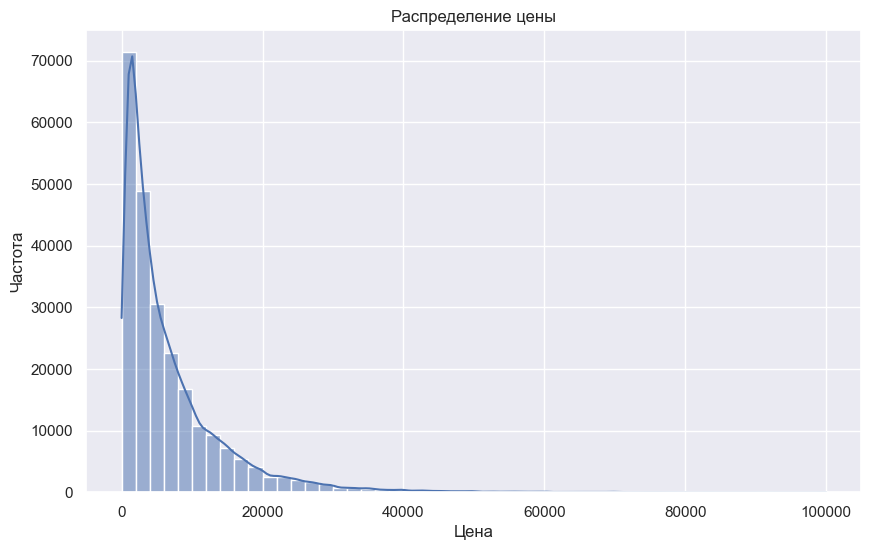

In [200]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

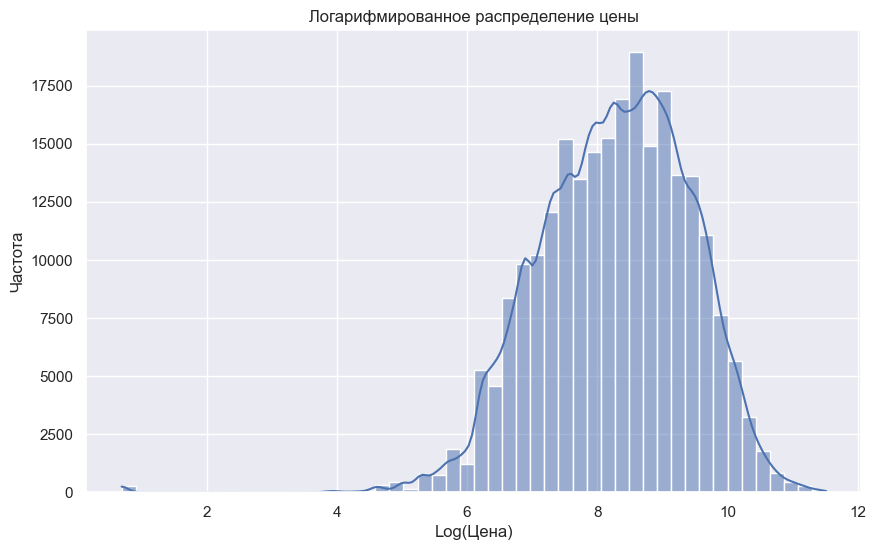

In [201]:
plt.figure(figsize=(10, 6))
sns.histplot(data['log_price'], bins=50, kde=True)
plt.title('Логарифмированное распределение цены')
plt.xlabel('Log(Цена)')
plt.ylabel('Частота')
plt.show()

In [202]:
data[data['price'] < 100]

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price,bias
47,mercedes_benz,e_klasse,limousine,manuell,diesel,nein,113,150000,252,1,0.693147,1
167,audi,80,limousine,manuell,benzin,nein,90,70000,309,1,0.693147,1
634,suzuki,swift,kleinwagen,manuell,benzin,nein,53,150000,225,98,4.595120,1
649,opel,omega,kombi,manuell,benzin,nein,136,150000,219,1,0.693147,1
1291,jaguar,x_type,limousine,automatik,diesel,nein,241,30000,31,1,0.693147,1
...,...,...,...,...,...,...,...,...,...,...,...,...
240184,nissan,andere,bus,manuell,diesel,ja,101,150000,134,1,0.693147,1
240209,volkswagen,polo,kleinwagen,manuell,benzin,nein,125,150000,208,1,0.693147,1
240364,bmw,3er,kombi,automatik,diesel,nein,200,150000,105,1,0.693147,1
240714,citroen,andere,kleinwagen,manuell,benzin,ja,60,150000,211,90,4.510860,1


In [203]:
data[data['price'] > 80000]

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price,bias
4990,mercedes_benz,sl,cabrio,automatik,benzin,nein,435,40000,29,89000,11.396403,1
5000,porsche,911,coupe,manuell,benzin,nein,510,20000,236,93000,11.440366,1
5233,porsche,andere,limousine,automatik,benzin,nein,500,10000,64,95000,11.461643,1
12068,porsche,911,cabrio,automatik,benzin,nein,400,50000,29,98500,11.497822,1
12499,porsche,911,coupe,automatik,benzin,nein,400,80000,34,85500,11.356283,1
...,...,...,...,...,...,...,...,...,...,...,...,...
223309,mercedes_benz,sl,cabrio,automatik,benzin,nein,407,40000,122,85000,11.350418,1
229154,porsche,911,coupe,automatik,benzin,nein,349,40000,27,83500,11.332614,1
232856,audi,andere,coupe,automatik,benzin,nein,430,30000,65,82500,11.320566,1
235667,porsche,911,cabrio,automatik,benzin,nein,408,40000,58,84999,11.350407,1


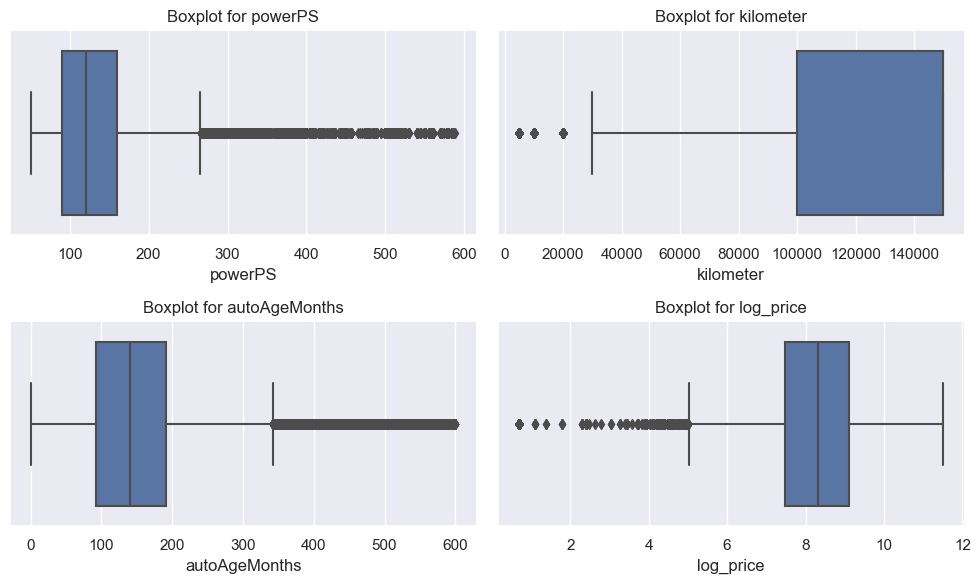

In [204]:
numeric = ['powerPS', 'kilometer', 'autoAgeMonths', 'log_price']

plt.figure(figsize=(10, 6))
for i, col in enumerate(numeric, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

Возраст и пробег сильно влияют на стоимость

Очистим выбросы

In [205]:
def handle_outliers(df, column, remove=False):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    if remove:
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    else:
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        return len(outliers), lower_bound, upper_bound

for col in numeric:
    num_outliers, lower, upper = handle_outliers(data, col)
    print(f"{col}: {num_outliers} выбросов (границы: {lower:.2f}, {upper:.2f})")
    data = handle_outliers(data, col, remove=True)

print(f"Размер данных после удаления выбросов: {data.shape}")

powerPS: 8065 выбросов (границы: -15.00, 265.00)
kilometer: 6854 выбросов (границы: 25000.00, 225000.00)
autoAgeMonths: 2509 выбросов (границы: -51.00, 341.00)
log_price: 1102 выбросов (границы: 5.04, 11.35)
Размер данных после удаления выбросов: (222660, 12)


Матрица корреляции:
                powerPS  kilometer  autoAgeMonths  log_price
powerPS        1.000000   0.033658      -0.217644   0.542356
kilometer      0.033658   1.000000       0.512335  -0.444443
autoAgeMonths -0.217644   0.512335       1.000000  -0.741831
log_price      0.542356  -0.444443      -0.741831   1.000000


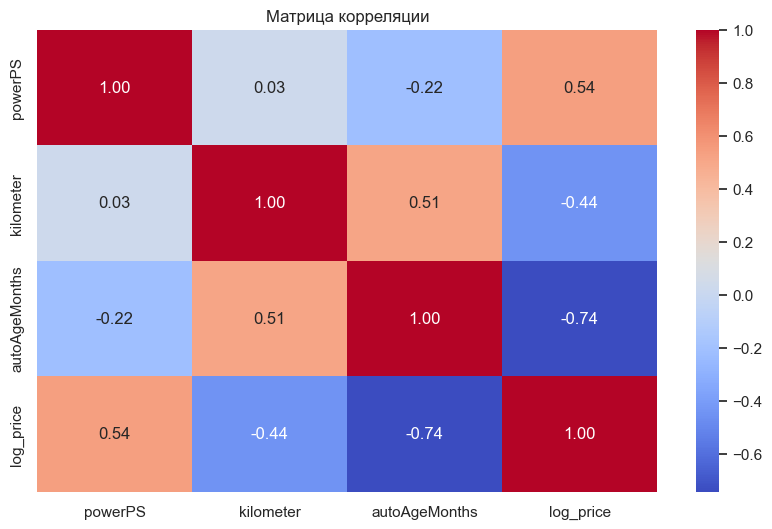

In [206]:
correlation_matrix = data[numeric].corr()

print("Матрица корреляции:")
print(correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Матрица корреляции")
plt.show()

Цена высоко коррелирует с возрастом, необходимо посмотреть распределение

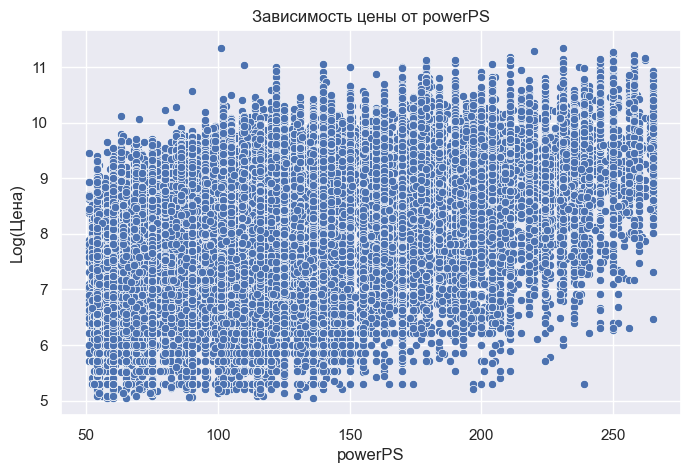

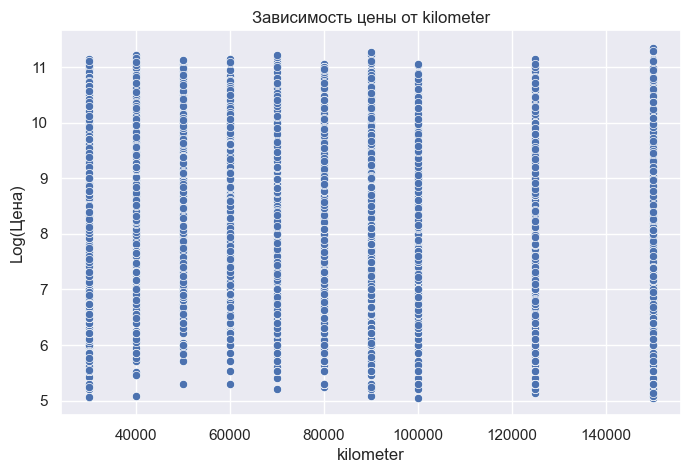

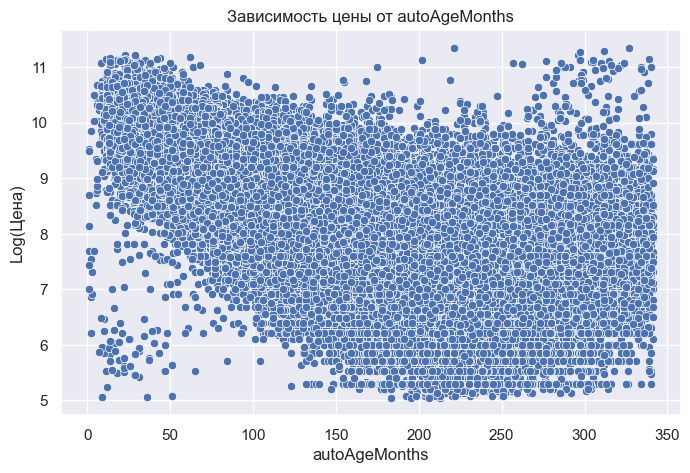

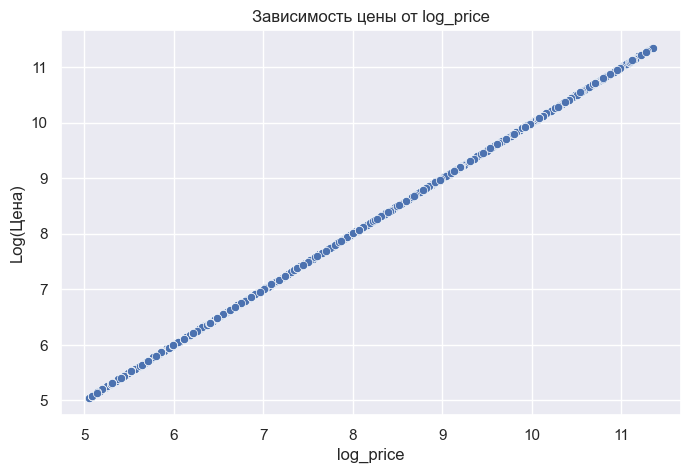

In [207]:
for feature in numeric:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data[feature], y=data['log_price'])
    plt.title(f'Зависимость цены от {feature}')
    plt.xlabel(feature)
    plt.ylabel('Log(Цена)')
    plt.show()

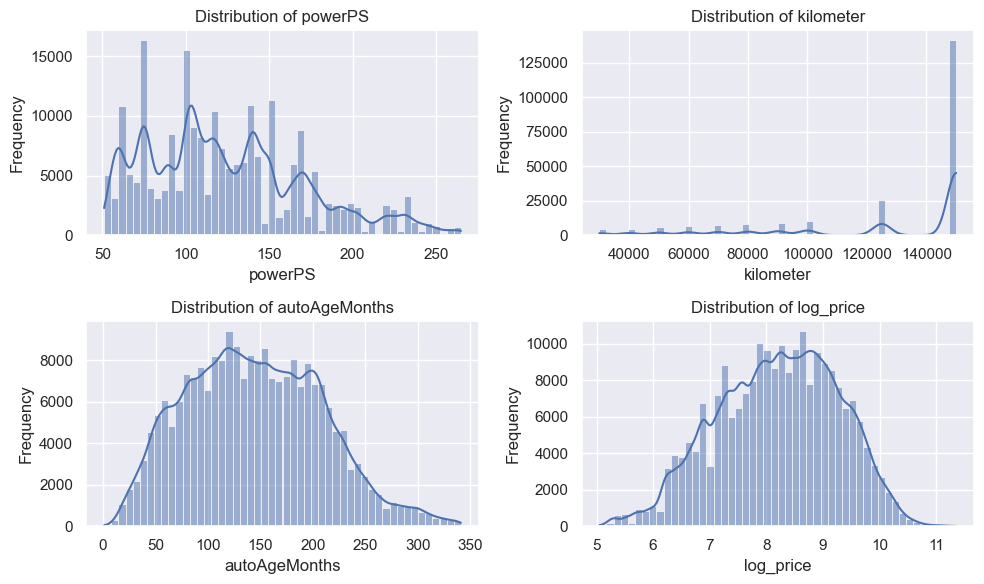

In [208]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(numeric, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

По километрам график некорректный, надо его поправить

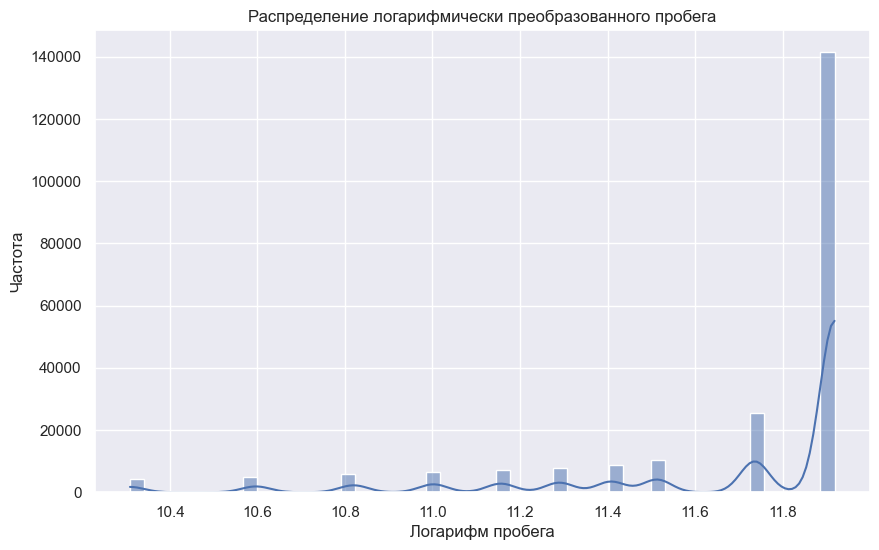

In [209]:
data["log_kilometer"] = np.log1p(data["kilometer"])

plt.figure(figsize=(10, 6))
sns.histplot(data["log_kilometer"], bins=50, kde=True)
plt.xlabel("Логарифм пробега") 
plt.ylabel("Частота")  
plt.title("Распределение логарифмически преобразованного пробега")
plt.show()

In [210]:
data.kilometer.value_counts()

150000    141432
125000     25481
100000     10458
90000       8789
80000       7901
70000       7106
60000       6549
50000       5734
40000       4801
30000       4409
Name: kilometer, dtype: int64

In [211]:
bins = [0, 50_000, 100_000, 150_000]
labels = ["0-50k", "50-100k", "100-150k"]

data["kilometer_category"] = pd.cut(
    data["kilometer"], 
    bins=bins, 
    labels=labels, 
    right=True  
)

data["sqrt_kilometer"] = np.sqrt(data["kilometer"])

In [212]:
print(data["kilometer_category"].value_counts())

100-150k    166913
50-100k      40803
0-50k        14944
Name: kilometer_category, dtype: int64


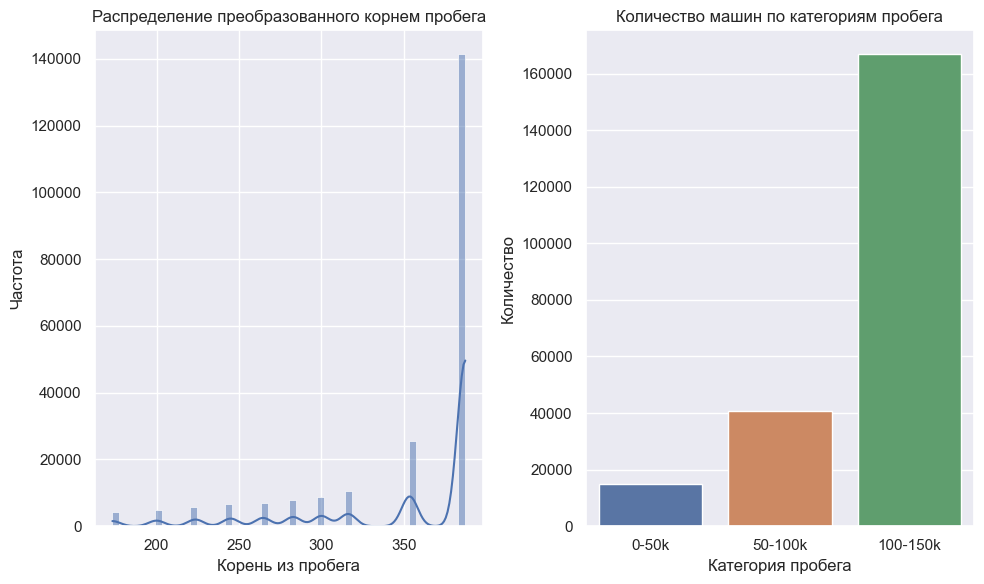

In [213]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.histplot(data["sqrt_kilometer"], bins=50, kde=True)
plt.xlabel("Корень из пробега")  
plt.ylabel("Частота")  
plt.title("Распределение преобразованного корнем пробега")  

plt.subplot(1, 2, 2)
sns.countplot(x=data["kilometer_category"], order=["0-50k", "50-100k", "100-150k"])
plt.xlabel("Категория пробега")  
plt.ylabel("Количество")        
plt.title("Количество машин по категориям пробега") 

plt.tight_layout() 
plt.show()

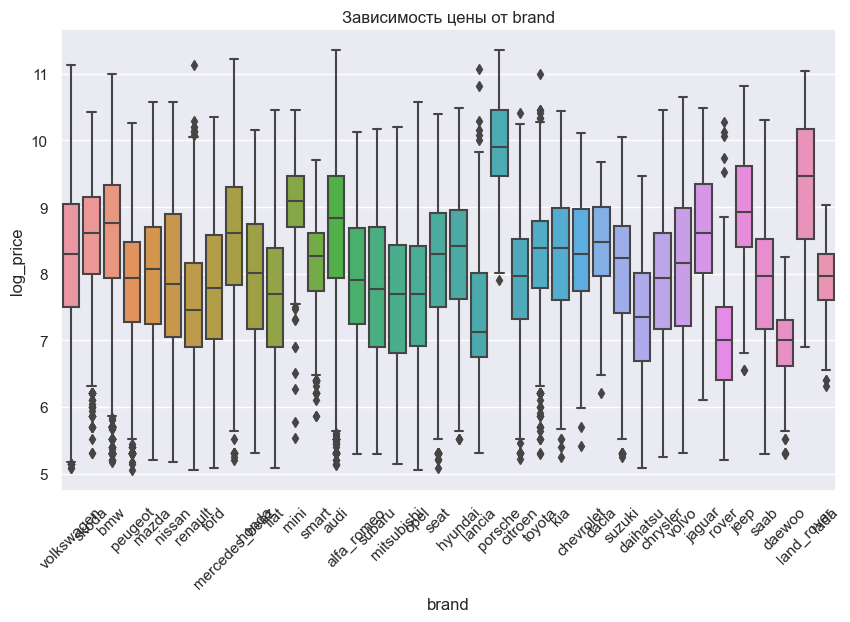

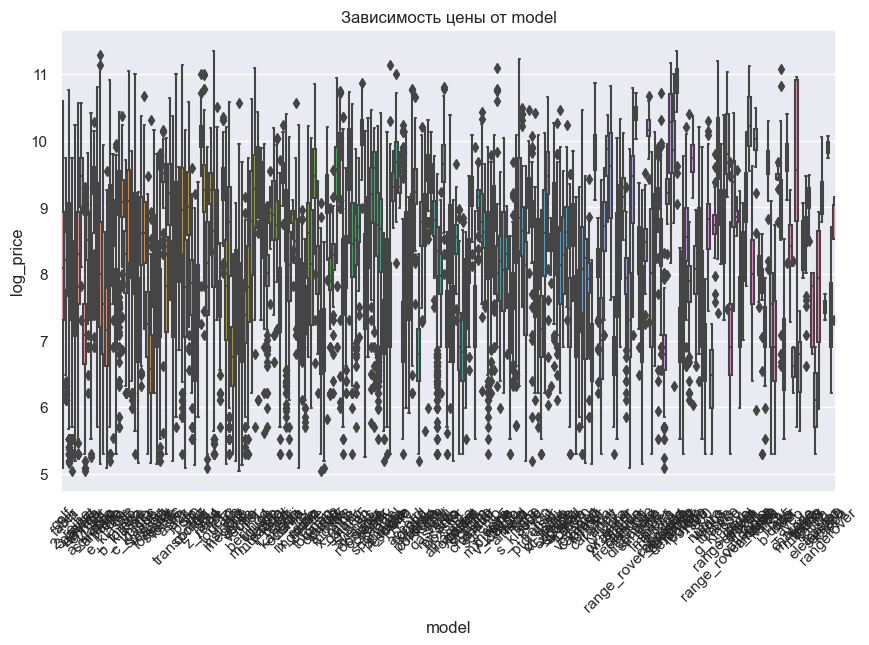

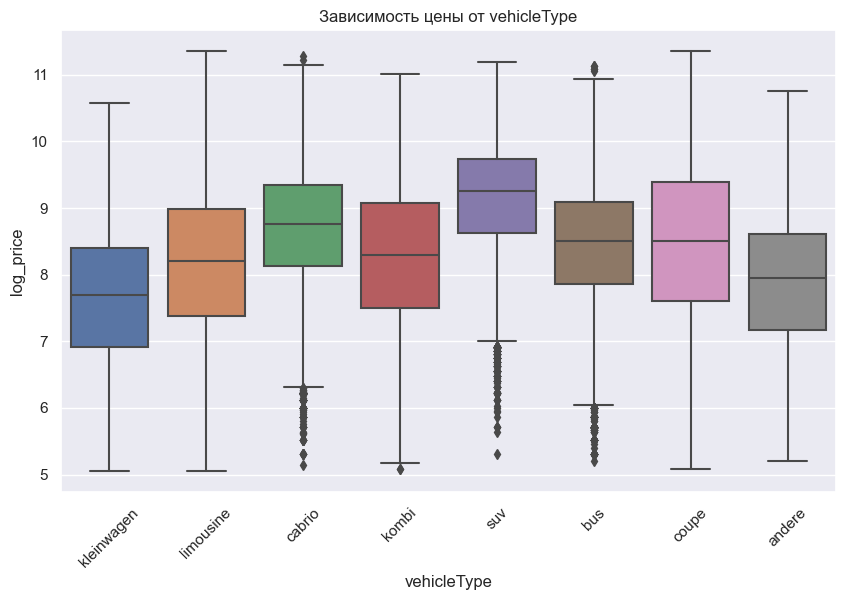

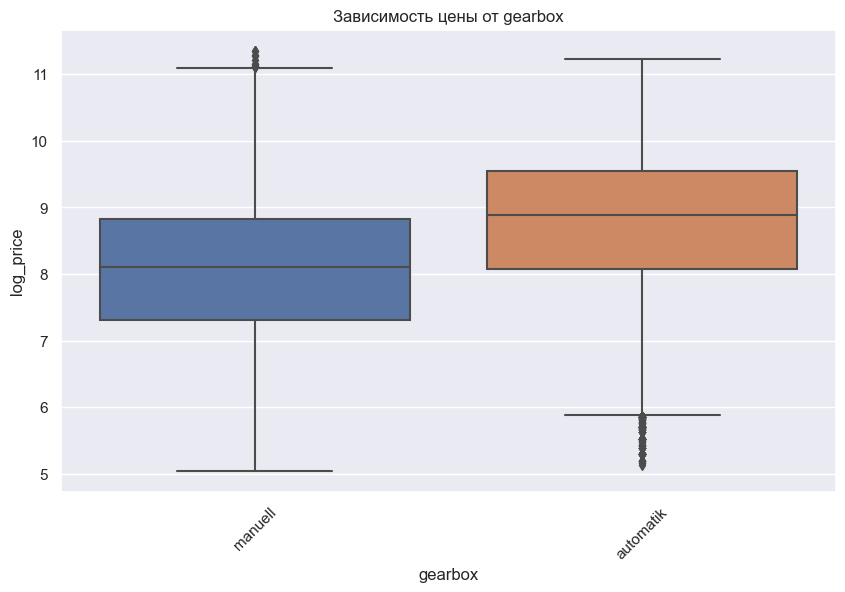

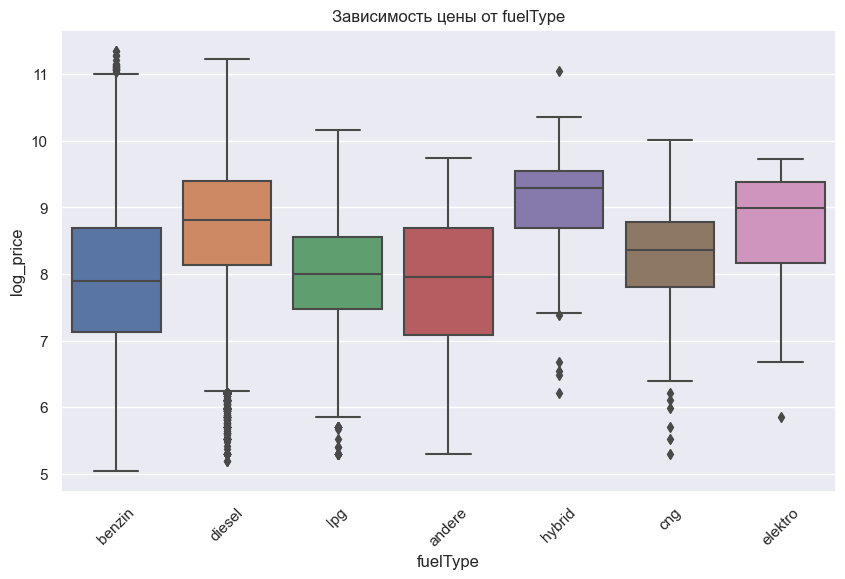

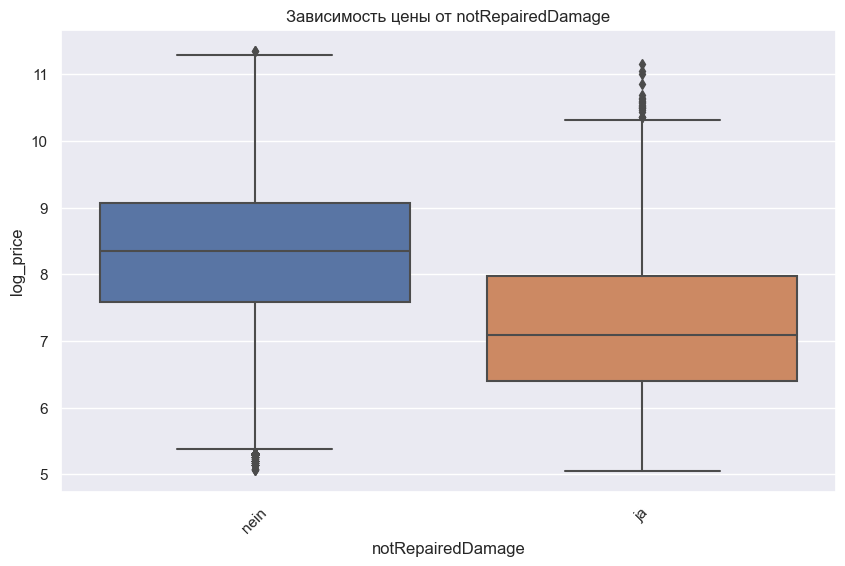

In [214]:
for feature in categorical:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='log_price', data=data)
    plt.title(f'Зависимость цены от {feature}')
    plt.xticks(rotation=45)
    plt.show()

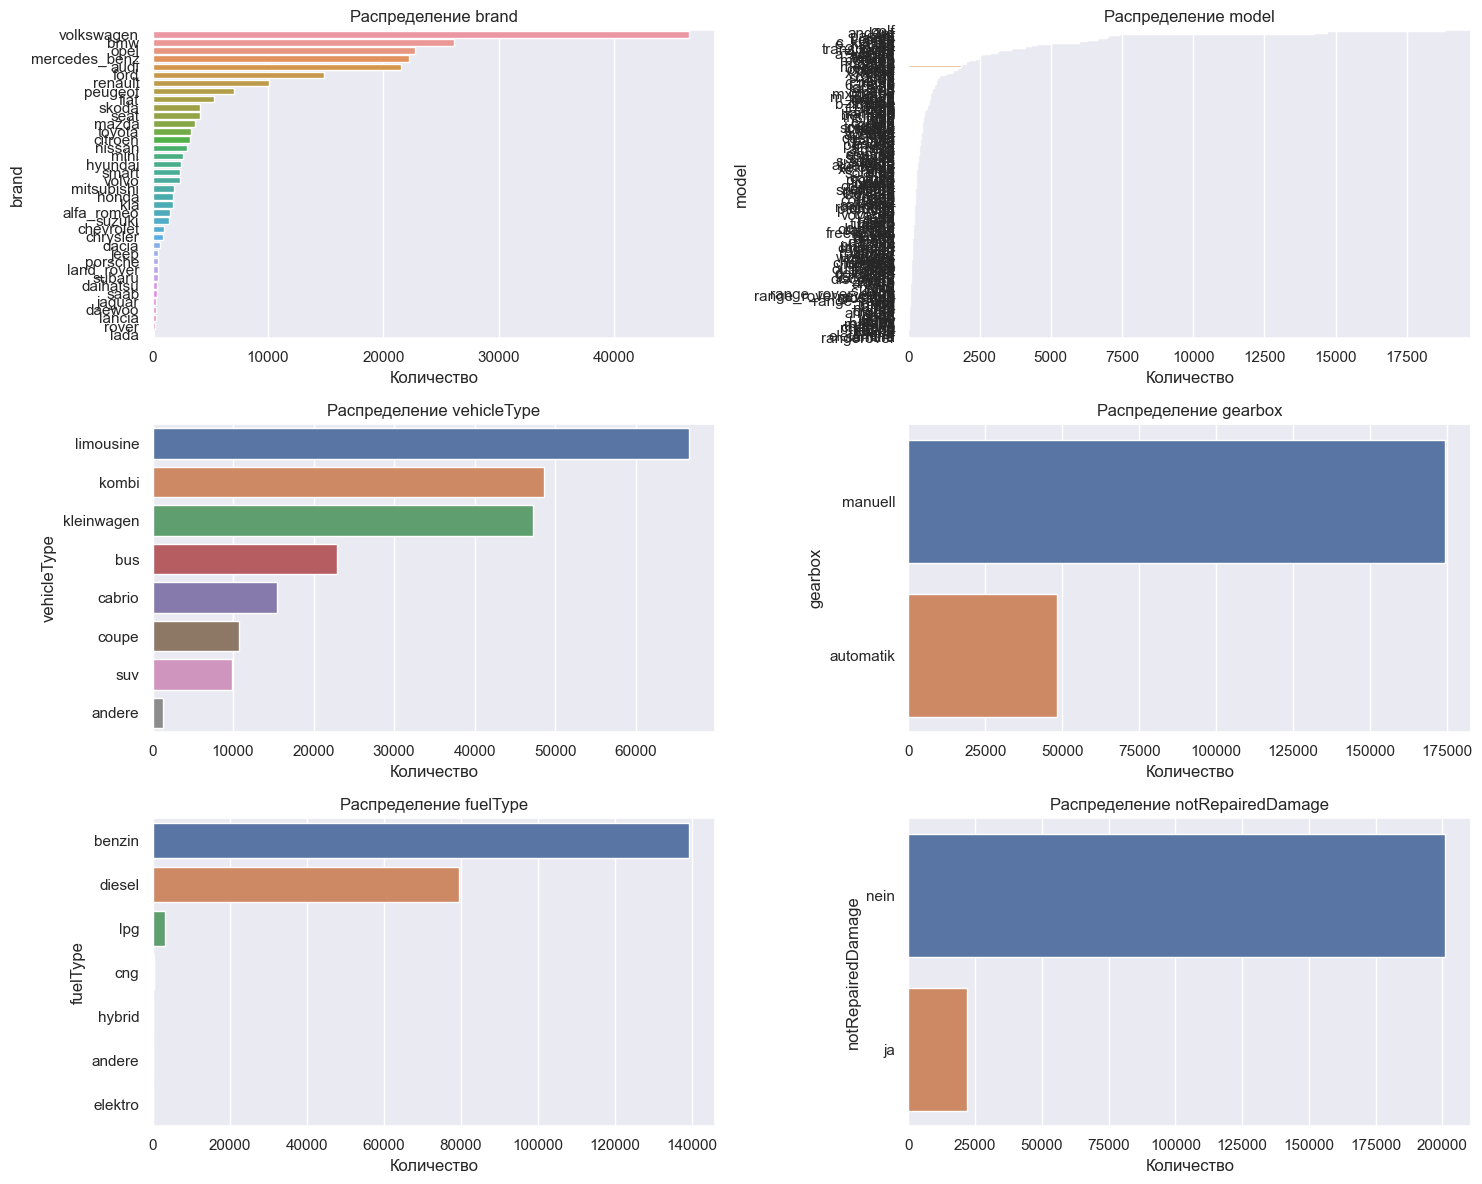

In [215]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical, 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f"Распределение {col}")
    plt.xlabel("Количество")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Примениим стандартизацию для данных

In [216]:
from sklearn.preprocessing import StandardScaler

numeric = ["powerPS", "log_kilometer", "autoAgeMonths"]

scaler = StandardScaler()
data[numeric] = scaler.fit_transform(data[numeric])

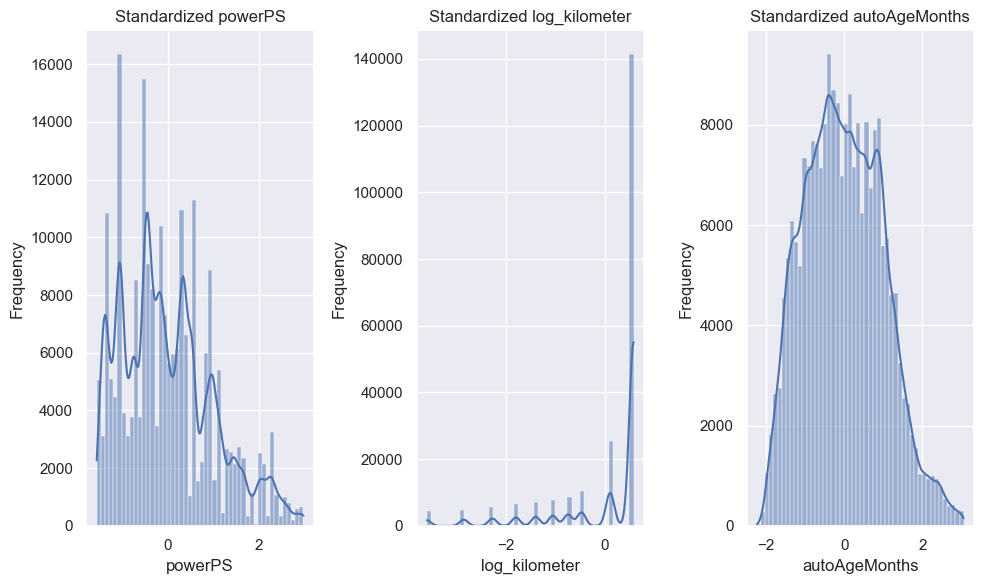

In [217]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(["powerPS", "log_kilometer", "autoAgeMonths"], 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(f"Standardized {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [218]:
data.columns

Index(['brand', 'model', 'vehicleType', 'gearbox', 'fuelType',
       'notRepairedDamage', 'powerPS', 'kilometer', 'autoAgeMonths', 'price',
       'log_price', 'bias', 'log_kilometer', 'kilometer_category',
       'sqrt_kilometer'],
      dtype='object')

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_features = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'kilometer_category']
numeric_features = ['powerPS', 'log_kilometer', 'autoAgeMonths']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

x = data.drop('price', axis=1) 
y = data['price']

X_transformed = column_transformer.fit_transform(x)

X_train, X_temp, y_train, y_temp = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер валидационной выборки: {X_val.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (178128, 309)
Размер валидационной выборки: (22266, 309)
Размер тестовой выборки: (22266, 309)


## Задание 5. Сравнение методов градиентного спуска (1 балл)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.5 балла)

Процесс выбора наиболее подходящего размера шага $\lambda$ для различных методов, с учетом валидационного набора данных, предполагает выполнение следующих шагов:

1. **Определение диапазона для $\lambda$**: Начните с выбора диапазона значений $\lambda$, используя логарифмическую сетку от $10^{-4}$ до $10^1$, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Перебор значений $\lambda$**: Для каждого значения из выбранной сетки $\lambda$:
   - Произведите обучение модели на обучающем наборе данных.
   - Вычислите ошибку на обучающем и валидационном наборах данных.
   - Определите значение метрики $R^2$ как на обучающем, так и на валидационном наборах.
   - Зафиксируйте количество итераций, необходимое для достижения сходимости.

3. **Оценка полученных результатов**:
   - Составьте графики, отображающие зависимость ошибки от количества итераций для каждого значения $\lambda$ по всем рассматриваемым методам.
   - Сравните методы на основе скорости сходимости, размера ошибки и значения метрики $R^2$ на различных наборах данных.

4. **Выбор наилучшего $\lambda$**: Исходя из проведенного анализа, определите наиболее подходящее значение $\lambda$ для каждого метода, обеспечивающее оптимальное сочетание скорости сходимости и качества модели на валидационной выборке.

5. **Формулировка выводов**: Подведите итоги, указав, какой метод показал наилучшую производительность с точки зрения соотношения скорости сходимости к качеству предсказаний. Также отметьте, как изменение $\lambda$ влияет на результаты каждого из методов.



In [220]:
from tqdm import tqdm
from sklearn.metrics import r2_score, mean_squared_error
from linear_regression import LinearRegression

X_train_np = X_train.toarray()
X_val_np = X_val.toarray()
X_test_np = X_test.toarray()

y_train_np = y_train.to_numpy()
y_val_np = y_val.to_numpy()
y_test_np = y_test.to_numpy()

lambda_values = np.logspace(-4, 1, 10)

descent_methods = ["full", "stochastic", "momentum", "adam"]

method_results = {method: {
    "lambda": [], "train_mse": [], "val_mse": [], "train_r2": [], "val_r2": [], "iterations": []
} for method in descent_methods}

for descent_name in descent_methods:
    print(f"\nТестируем метод спуска: {descent_name}")

    for lambda_ in tqdm(lambda_values, desc=f"Подбор лямбдя для {descent_name}"):
        descent_config = {
            "descent_name": descent_name,
            "kwargs": {"dimension": X_train_np.shape[1], "lambda_": lambda_}
        }

        model = LinearRegression(descent_config=descent_config, max_iter=1000, tolerance=1e-4)

        model.fit(X_train_np, y_train_np)

        y_train_pred = model.predict(X_train_np)
        y_val_pred = model.predict(X_val_np)

        train_mse = mean_squared_error(y_train_np, y_train_pred)
        val_mse = mean_squared_error(y_val_np, y_val_pred)
        train_r2 = r2_score(y_train_np, y_train_pred)
        val_r2 = r2_score(y_val_np, y_val_pred)

        method_results[descent_name]["lambda"].append(lambda_)
        method_results[descent_name]["train_mse"].append(train_mse)
        method_results[descent_name]["val_mse"].append(val_mse)
        method_results[descent_name]["train_r2"].append(train_r2)
        method_results[descent_name]["val_r2"].append(val_r2)
        method_results[descent_name]["iterations"].append(len(model.loss_history))


Тестируем метод спуска: full


Подбор лямбдя для full:  90%|█████████ | 9/10 [35:24<03:54, 234.46s/it]c:\Users\arzig\anaconda3\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\arzig\Desktop\Магистратура\2 Семестр\Машинное обучение\descents.py:203: RuntimeWarning: overflow encountered in square
  loss = np.mean((y - predictions) ** 2)
c:\Users\arzig\Desktop\Магистратура\2 Семестр\Машинное обучение\descents.py:220: RuntimeWarning: invalid value encountered in matmul
  return x @ self.w
c:\Users\arzig\Desktop\Магистратура\2 Семестр\Машинное обучение\descents.py:272: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 / n_samples * x.T @ (predictions - y)
Подбор лямбдя для full:  90%|█████████ | 9/10 [38:38<04:17, 257.62s/it]


ValueError: Input contains NaN.

### Задание 5.2. Сравнение методов (0.5 балла)

Создайте график, на котором будет показана динамика изменения ошибки на обучающей выборке в зависимости от номера итерации для каждого из рассматриваемых методов. Разместите линии, представляющие каждый метод, на одном и том же графике для наглядного сравнения.

После анализа результатов, представленных в виде графика и таблиц с метриками, выполните сравнение методов. Обратите внимание на следующие аспекты:
- Как быстро каждый метод сходится к минимуму ошибки.
- Величину ошибки на обучающей и тестовой выборках для каждого метода.
- Значение метрики $R^2$ для каждого метода на обучающей и тестовой выборках.
- Количество итераций, необходимых для достижения сходимости.

На основе этих данных сделайте вывод о преимуществах и недостатках каждого из методов в контексте вашей задачи.

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

## Задание 6. Стохастический градиентный спуск и размер батча (0.5 балла)

Ваша задача — исследовать, как размер батча влияет на процесс обучения при использовании стохастического градиентного спуска (SGD). Выполните следующие шаги:

1. **Выбор размеров батча**: Определите ряд значений для размера батча, которые вы хотите исследовать. Это могут быть, например, %1$, $10$, $50$, $100$, $500$, и так далее.

2. **Многократные запуски для каждого размера батча**: Для каждого выбранного размера батча проведите $k$ независимых запусков стохастического градиентного спуска на обучающей выборке. $k$ может быть равно, например, $10$. Для каждого запуска замерьте:
   - Время обучения в секундах до достижения сходимости.
   - Количество итераций (шагов), необходимых для сходимости.

3. **Вычисление средних значений**: Рассчитайте среднее время обучения и среднее количество итераций до сходимости для каждого размера батча.

4. **Построение графиков**:
   - Постройте график, показывающий зависимость среднего количества итераций до сходимости от размера батча.
   - Постройте график, показывающий зависимость среднего времени обучения от размера батча.

5. **Анализ результатов**: Оцените, как размер батча влияет на скорость и эффективность обучения. Сделайте выводы о том, какой размер батча может быть оптимальным с точки зрения баланса между временем обучения и количеством итераций до сходимости.

Этот эксперимент поможет вам лучше понять влияние размера батча на процесс обучения стохастического градиентного спуска и как этот параметр можно настроить для улучшения производительности обучения.

In [ ]:
batch_sizes = np.arange(5, 500, 10)

#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

## Задание 7. Регуляризация (0.5 балла)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Вам предстоит исследовать, как настройка параметров обучения с включением регуляризации влияет на различные методы градиентного спуска. Основная цель — определить оптимальные значения для длины шага $\lambda$ и коэффициента регуляризации $\mu$, а затем сравнить результаты обучения с регуляризацией и без неё по нескольким критериям.

Ваш план действий следующий:

1. **Выбор параметров для подбора**: Установите диапазон значений для длины шага $\lambda$ и коэффициента регуляризации $\mu$. Используйте логарифмическую сетку для обоих параметров, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Оптимизация и сравнение методов градиентного спуска**:
   - Произведите подбор параметров для каждого метода градиентного спуска, исследуя их влияние на процесс обучения.
   - Замерьте и сравните ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках, а также количество итераций до сходимости для моделей с регуляризацией и без неё.

3. **Визуализация результатов**:
   - Постройте для каждого метода графики, отображающие значения функции потерь (MSE) с регуляризацией и без неё на протяжении процесса обучения.

4. **Анализ результатов**:
   - Оцените, как регуляризация повлияла на сходимость методов.
   - Сравните качество моделей на обучающей и тестовой выборках с учетом регуляризации и без неё.
   - Проанализируйте, как изменения в длине шага и коэффициенте регуляризации отразились на итоговых результатах.

5. **Формулировка выводов**:
   - Сделайте выводы о влиянии регуляризации на процесс обучения и качество модели. Как регуляризация влияет на переобучение и обобщающую способность модели.
   - Рассмотрите, в каких случаях регуляризация приводит к улучшению результатов, и когда её вклад может быть минимальным или отрицательным.


In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

## Задание 8. Альтернативная функция потерь (0.5 балла)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log({cosh{(a - y)}}).
$$


Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ